__Tulis Nama dan Nim__

Nama : Royzan Wida Saputra 

NIM : A11.2023.15506

In [1]:
# !pip install -U -q PyDrive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# !ls /content/drive/My Drive/Ds3/UAS/water_potability.csv'

In [3]:
# Import lib yang perlu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np

Step 1: Pengumpulan Data

In [4]:
# # Baca dataset code-cell berikut
# water_data = pd.read_csv('/content/drive/My Drive/Ds3/UAS/water_potability.csv')

# water_data.head()

# water_data = pd.read_csv('/content/drive/My Drive/Ds3/UAS/water_potability.csv')

# water_data.head()

df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Step 2: Menelaah Data

In [5]:
# Menelaah Data
print(f"Jumlah baris dan kolom: {water_data.shape[0]} baris, {water_data.shape[1]} kolom\n")
print("Kolom dan tipe datanya:")
for col, dtype in water_data.dtypes.items():
    print(f"- {col}: {dtype}")

print("\nJumlah nilai unik per kolom:")
for col, unique in water_data.nunique().items():
    print(f"- {col}: {unique} ")

print("\nJumlah nilai yang hilang per kolom:")
for col, missing in water_data.isnull().sum().items():
    print(f"- {col}: {missing} nilai hilang")

print("\nInfo perkolom:")
water_data.info()

NameError: name 'water_data' is not defined

Step 3: Validasi dan Visualisasi Data

Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Outlier Detection:
ph: 142 outliers
Hardness: 83 outliers
Solids: 47 outliers
Chloramines: 61 outliers
Sulfate: 264 outliers
Conductivity: 11 outliers
Organic_carbon: 25 outliers
Trihalomethanes: 54 outliers
Turbidity: 19 outliers


<ipython-input-180-76d18aa0e600>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=water_data_filled, palette='viridis')


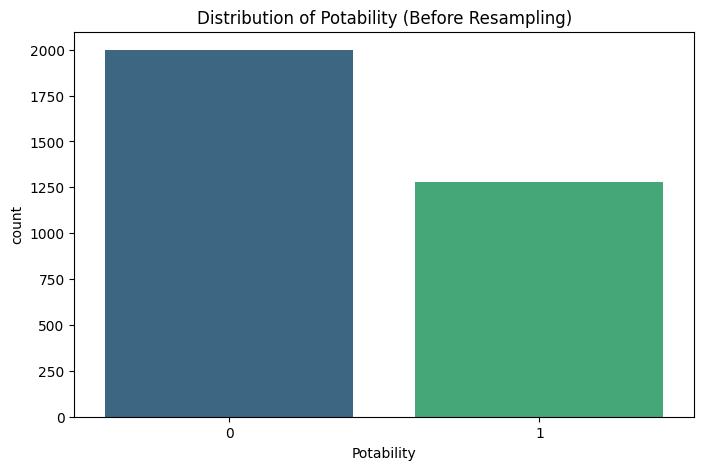

In [ ]:
# Cek Missing Values
print("Missing Values:")
print(water_data.isnull().sum())

# Handle Missing Values dengan Mean
water_data_filled = water_data.fillna(water_data.mean())

# Cek Outlier menggunakan IQR
print("Outlier Detection:")
for column in water_data_filled.columns[:-1]:  # Exclude 'Potability'
    Q1 = water_data_filled[column].quantile(0.25)
    Q3 = water_data_filled[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = water_data_filled[(water_data_filled[column] < lower_bound) | (water_data_filled[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")

# Visualisasi Distribusi Sebelum Resampling
plt.figure(figsize=(8, 5))
sns.countplot(x='Potability', data=water_data_filled, palette='viridis')
plt.title('Distribution of Potability (Before Resampling)')
plt.show()

Step 4: Menentukan Objek Data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
<ipython-input-181-1b6ae1e5bece>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


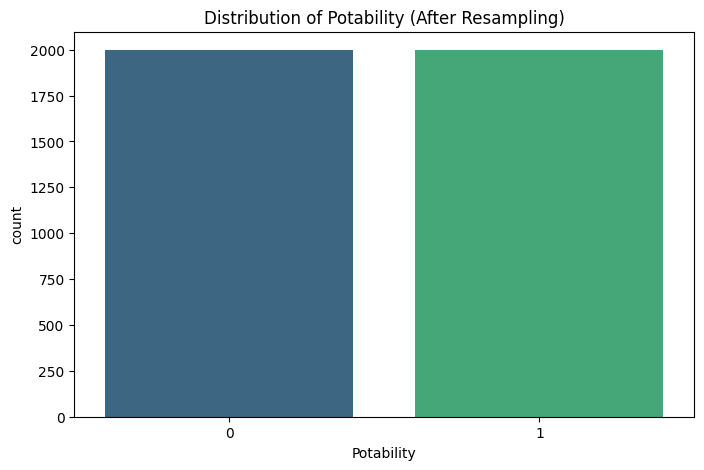

In [ ]:
X = water_data_filled[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = water_data_filled['Potability']

# Resampling untuk mengatasi ketidakseimbangan kelas
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Visualisasi Distribusi Setelah Resampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribution of Potability (After Resampling)')
plt.show()

In [ ]:
y_resampled.value_counts()

,count
Potability,
0,1998
1,1998



Step 5: Membersihkan Data

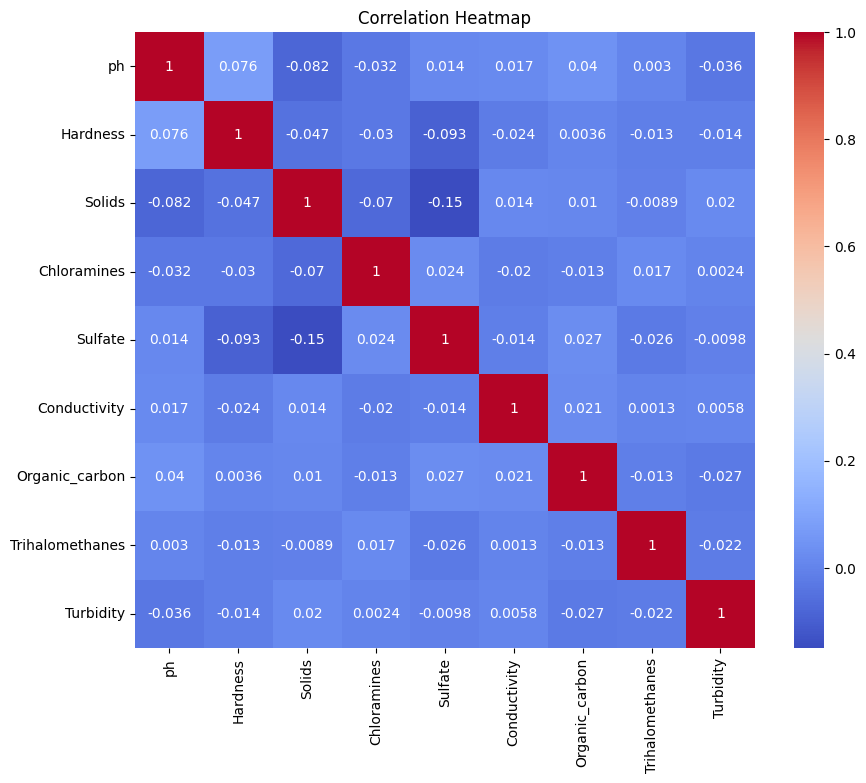

In [ ]:
# Korelasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

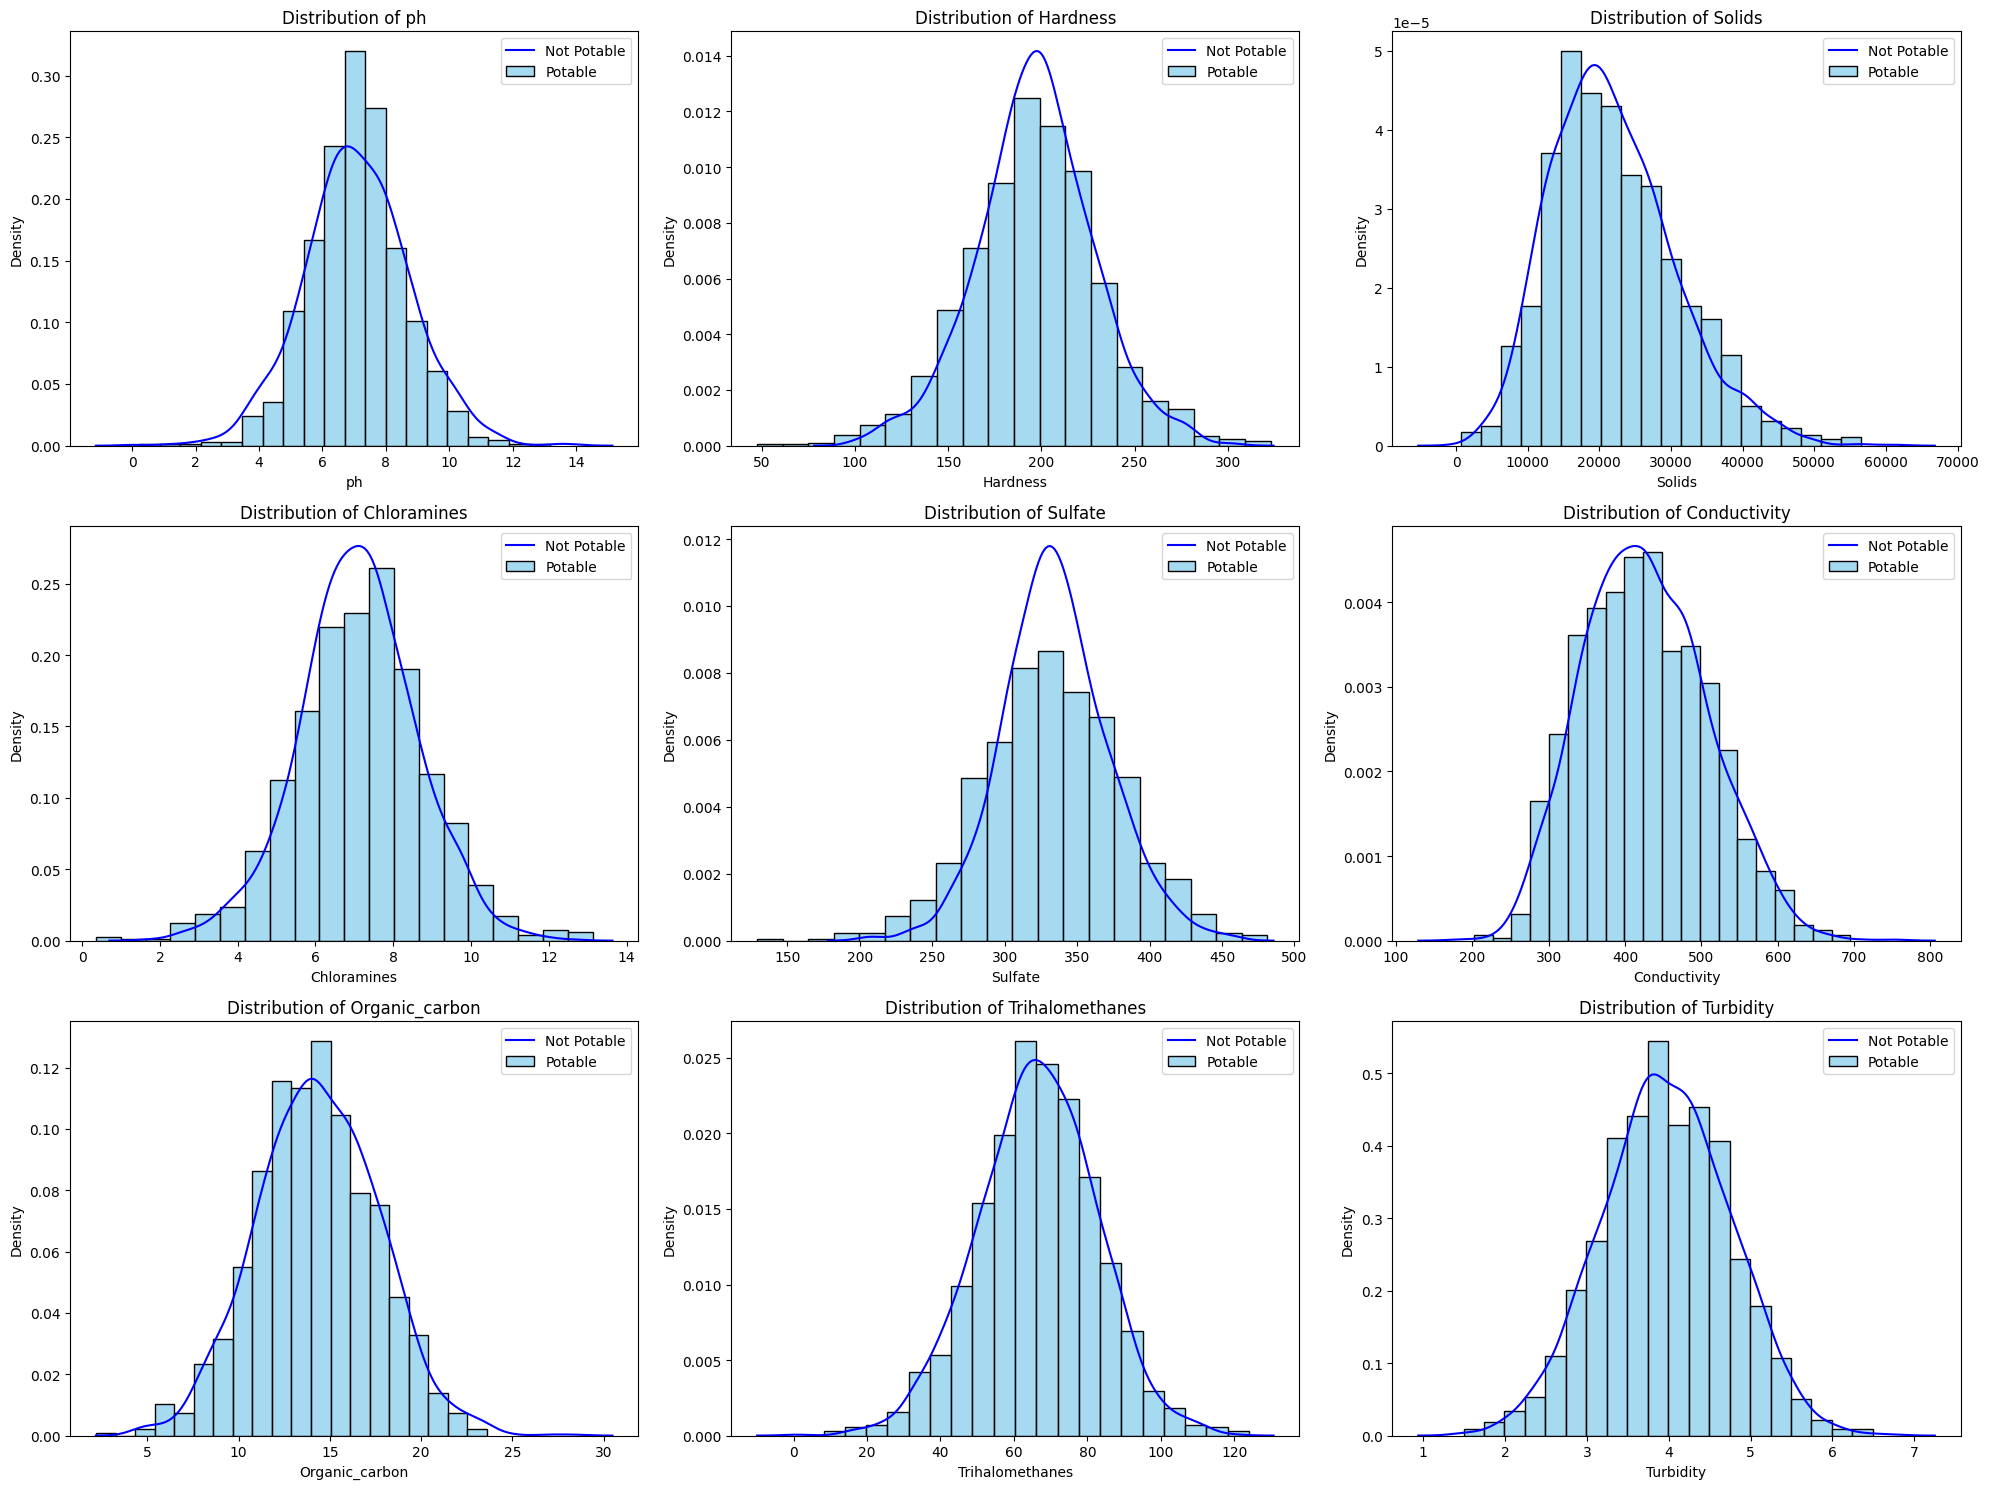

In [ ]:
# Assuming 'water_data' is your DataFrame
potable_data = water_data[water_data['Potability'] == 1]
non_potable_data = water_data[water_data['Potability'] == 0]

# Get the list of numerical features (attributes) for plotting
numerical_features = water_data.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('Potability')  # Remove 'Potability' as it's the target variable

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    ax = axes[i]

    sns.kdeplot(non_potable_data[feature], ax=ax, label='Not Potable', color='blue', fill=False)


    sns.histplot(potable_data[feature], ax=ax, label='Potable', color='skyblue', stat="density", bins=20)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

# Hide any unused subplots (if there are fewer than 9 numerical features)
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Step 7: Pemodelan

Decision Tree Accuracy: 0.71


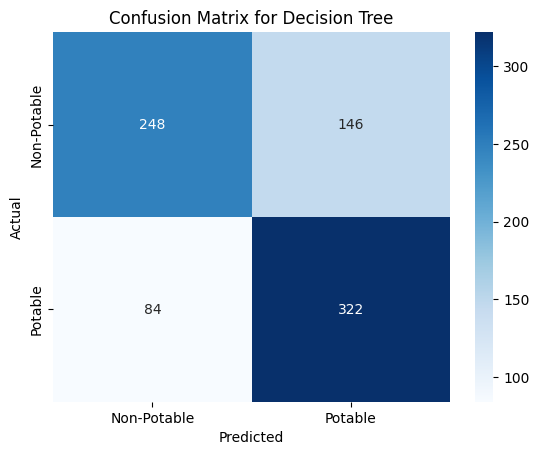

Random Forest Accuracy: 0.78


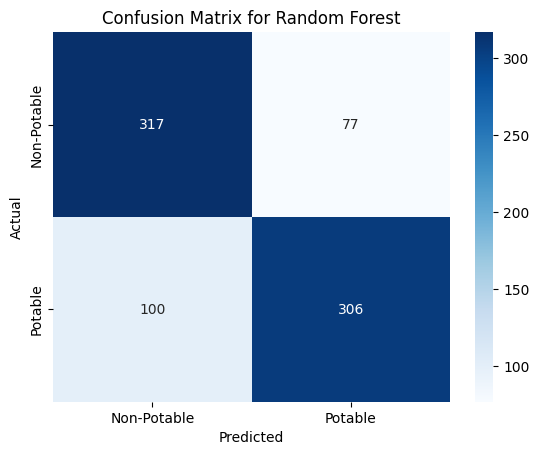

C4.5 (Decision Tree with Entropy) Accuracy: 0.71


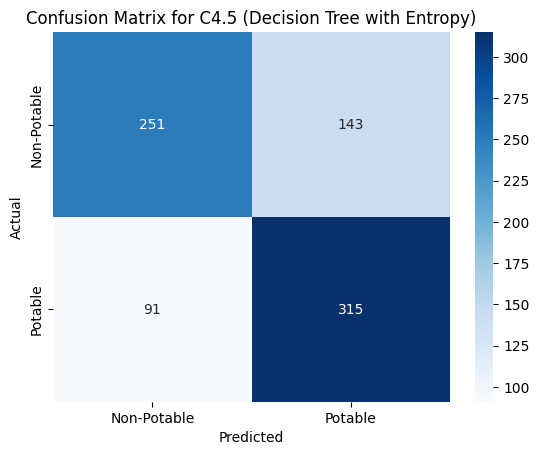

XGBoost Accuracy: 0.76


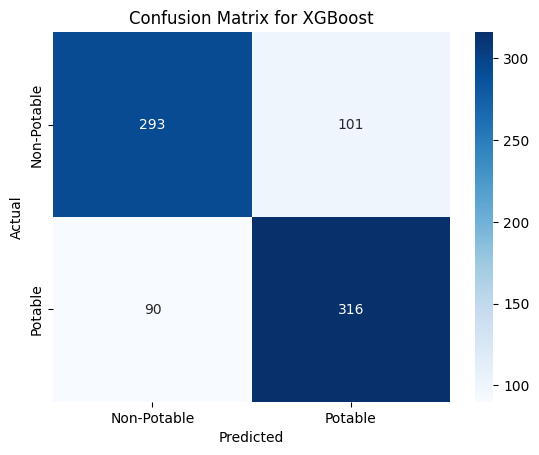

Final Model Evaluation Summary:
Decision Tree: Accuracy = 0.71
Random Forest: Accuracy = 0.78
C4.5 (Decision Tree with Entropy): Accuracy = 0.71
XGBoost: Accuracy = 0.76


In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'C4.5 (Decision Tree with Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_normalized, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_normalized)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': cm
    }

    # Display results
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Potable', 'Potable'],
                yticklabels=['Non-Potable', 'Potable'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Final Evaluation Summary
print("Final Model Evaluation Summary:")
for model_name, result in results.items():
    print(f"{model_name}: Accuracy = {result['accuracy']:.2f}")

Random Forest Accuracy (Before Normalization): 0.78


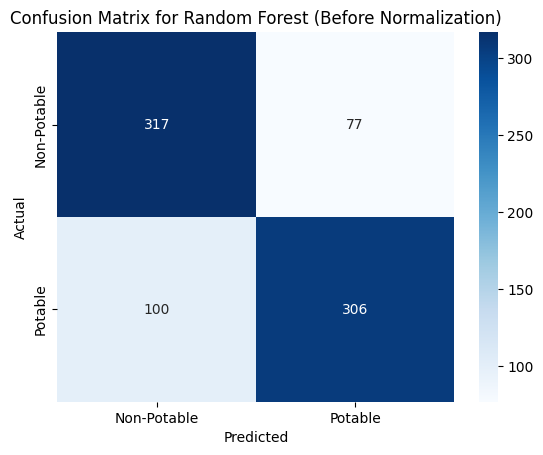

Decision Tree Accuracy (Before Normalization): 0.71


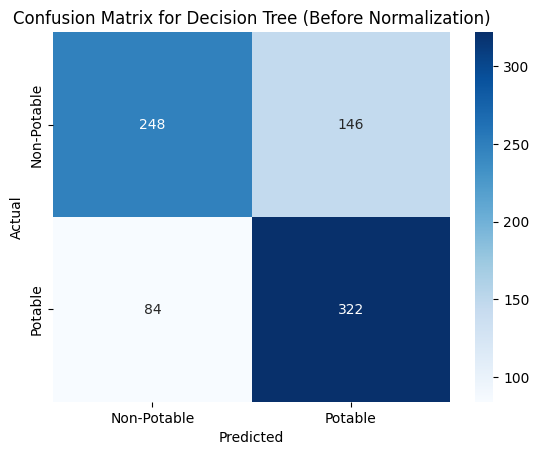

C4.5 (Decision Tree with Entropy) Accuracy (Before Normalization): 0.71


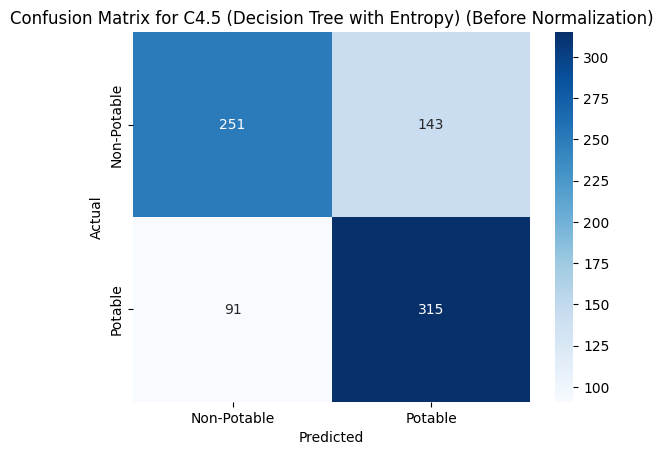

XGBoost Accuracy (Before Normalization): 0.76


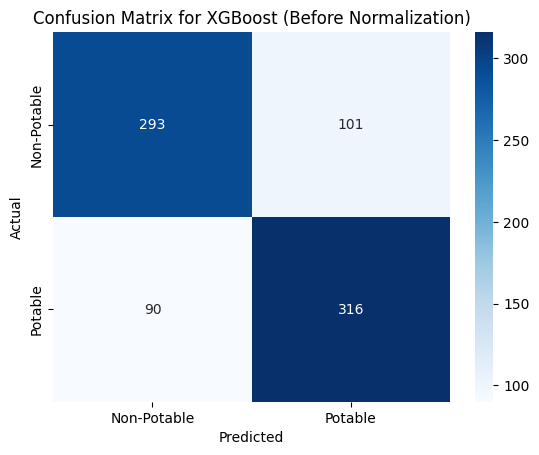

Random Forest Accuracy (After Normalization): 0.78


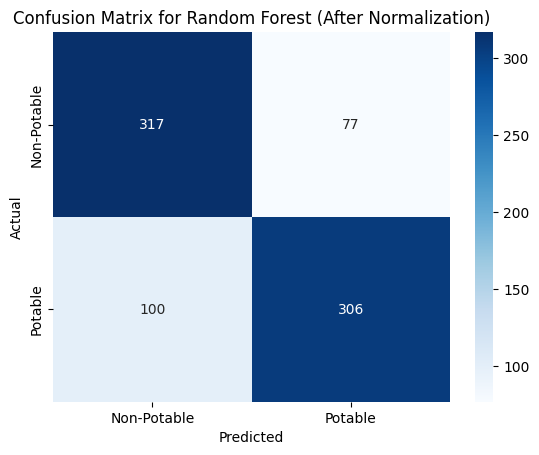

Decision Tree Accuracy (After Normalization): 0.71


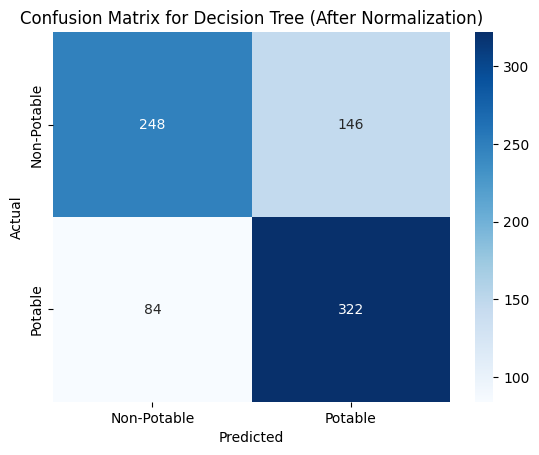

C4.5 (Decision Tree with Entropy) Accuracy (After Normalization): 0.71


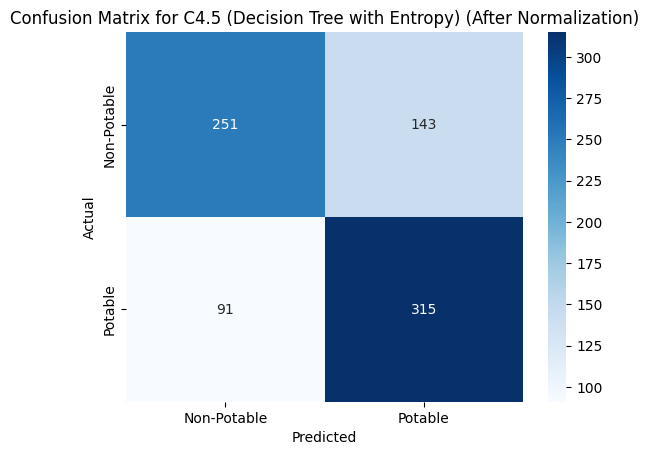

XGBoost Accuracy (After Normalization): 0.76


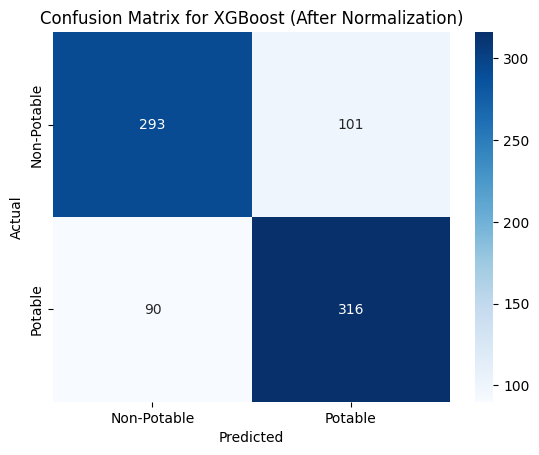


--- Comparison of Model Performance ---
Accuracy Before Normalization:
Random Forest: 0.78
Decision Tree: 0.71
C4.5 (Decision Tree with Entropy): 0.71
XGBoost: 0.76

Accuracy After Normalization:
Random Forest: 0.78
Decision Tree: 0.71
C4.5 (Decision Tree with Entropy): 0.71
XGBoost: 0.76


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define models (including C4.5, which is emulated using Decision Tree with entropy)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'C4.5 (Decision Tree with Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, normalized=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, cm

# Store results for comparison
results_before_norm = {}
results_after_norm = {}

# Evaluate each model before normalization
for model_name, model in models.items():
    accuracy, cm = evaluate_model(model, X_train, X_test, y_train, y_test, normalized=False)
    results_before_norm[model_name] = {'accuracy': accuracy, 'confusion_matrix': cm}

    # Display results
    print(f"{model_name} Accuracy (Before Normalization): {accuracy:.2f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Potable', 'Potable'],
                yticklabels=['Non-Potable', 'Potable'])
    plt.title(f"Confusion Matrix for {model_name} (Before Normalization)")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model after normalization
for model_name, model in models.items():
    accuracy, cm = evaluate_model(model, X_train_normalized, X_test_normalized, y_train, y_test, normalized=True)
    results_after_norm[model_name] = {'accuracy': accuracy, 'confusion_matrix': cm}

    # Display results
    print(f"{model_name} Accuracy (After Normalization): {accuracy:.2f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Potable', 'Potable'],
                yticklabels=['Non-Potable', 'Potable'])
    plt.title(f"Confusion Matrix for {model_name} (After Normalization)")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Comparing results
print("\n--- Comparison of Model Performance ---")
print("Accuracy Before Normalization:")
for model_name, result in results_before_norm.items():
    print(f"{model_name}: {result['accuracy']:.2f}")

print("\nAccuracy After Normalization:")
for model_name, result in results_after_norm.items():
    print(f"{model_name}: {result['accuracy']:.2f}")